# Drill - Prepare the Data

###### Import modules and ignore harmless seaborn warnings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###### Build DataFrame from csv file

In [3]:
nycrime = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_2_supervised_learning/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
df = pd.read_csv(nycrime, skiprows=4)

###### Rows 348-350 contain only comments explaining the data; trim these rows

In [4]:
df = df[:348]

###### Preview the DataFrame before cleaning

In [5]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [6]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

###### Clean the data - Ensure numerical data is treated as such

In [7]:
def floatify(x):
    try:
        if ',' in str(x):
            x = x.replace(',', '')
        x = float(x)
    except ValueError:
        x = None
    return x

In [8]:
for col in df.columns:
    if col != 'City':
        df[col] = df[col].apply(floatify)

In [9]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [10]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


###### Clean the data - Drop a column of NaNs and rename other columns for readability

In [11]:
df['Rape\n(revised\ndefinition)1'].unique()

array([nan])

In [12]:
df = df.drop(columns=['Rape\n(revised\ndefinition)1'])

In [13]:
df = df.rename(columns={'Violent\ncrime': 'Violent_crime', 
                        'Murder and\nnonnegligent\nmanslaughter': 'Murder',
                        'Rape\n(legacy\ndefinition)2': 'Rape_legacy_def',
                        'Aggravated\nassault': 'Agg_assault',
                        'Property\ncrime': 'Prop_crime',
                        'Larceny-\ntheft': 'Larceny_theft',
                        'Motor\nvehicle\ntheft': 'Mot_vehicle_theft'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                 348 non-null object
Population           348 non-null float64
Violent_crime        348 non-null float64
Murder               348 non-null float64
Rape_legacy_def      348 non-null float64
Robbery              348 non-null float64
Agg_assault          348 non-null float64
Prop_crime           348 non-null float64
Burglary             348 non-null float64
Larceny_theft        348 non-null float64
Mot_vehicle_theft    348 non-null float64
Arson3               187 non-null float64
dtypes: float64(11), object(1)
memory usage: 32.7+ KB


###### Gather some basic statistical data for columns with numerical data

In [15]:
df.describe()

,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [16]:
df.head()

,City,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


###### How does property crime vary with population?

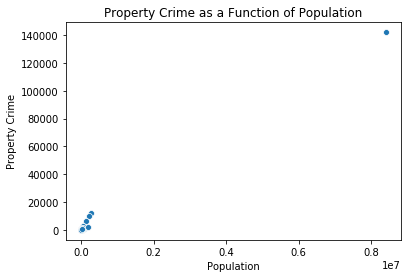

In [17]:
sns.scatterplot(x='Population', y='Prop_crime', data=df)
plt.title('Property Crime as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

###### How does murder vary with population?

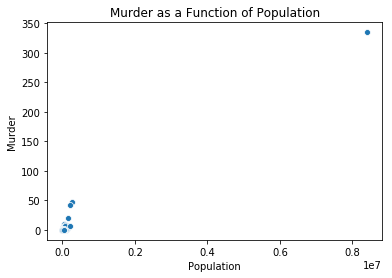

In [18]:
sns.scatterplot(x='Population', y='Murder', data=df)
plt.title('Murder as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()

###### How does robbery vary with population?

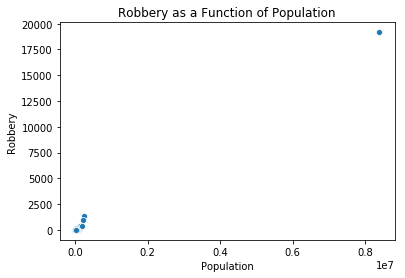

In [19]:
sns.scatterplot(x='Population', y='Robbery', data=df)
plt.title('Robbery as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Robbery')
plt.show()

###### There seems to be an outlier city with a population of over 8,000,000 people

In [20]:
df[df['Population'] > 8000000]

,City,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
216,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN


###### New York City seems to be an outlier and may be best compared with other large cities with more than one million people

In [21]:
# New York City may be in a class of its own - let's exclude it for now
df_lt_8M_people = df[df['Population'] < 8000000]

###### Construct a DataFrame to fit the specification requested for the exercise

In [22]:
model = df_lt_8M_people[['Prop_crime', 'Population']].copy()
model['Population^2'] = df_lt_8M_people['Population']**2
model['Murder_tf'] = df_lt_8M_people['Murder'] > 0
model['Robbery_tf'] = df_lt_8M_people['Robbery'] > 0
model['Murder_tf'] = model['Murder_tf'].astype(int)
model['Robbery_tf'] = model['Robbery_tf'].astype(int)

In [23]:
model.head()

,Prop_crime,Population,Population^2,Murder_tf,Robbery_tf
0,12.0,1861.0,3.463321e+06,0,0
1,24.0,2577.0,6.640929e+06,0,0
2,16.0,2846.0,8.099716e+06,0,0
3,4090.0,97956.0,9.595378e+09,1,1
4,223.0,6388.0,4.080654e+07,0,1


###### How are the variables distributed?

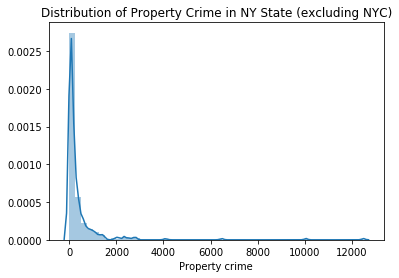

In [24]:
sns.distplot(model['Prop_crime'])
plt.title('Distribution of Property Crime in NY State (excluding NYC)')
plt.xlabel('Property crime')
plt.show()

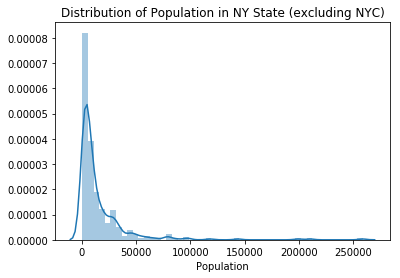

In [25]:
sns.distplot(model['Population'])
plt.title('Distribution of Population in NY State (excluding NYC)')
plt.xlabel('Population')
plt.show()

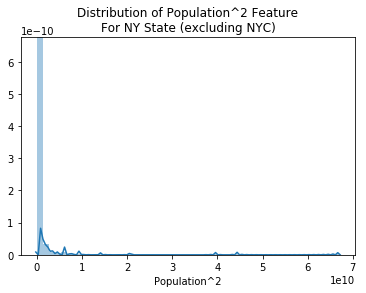

In [26]:
sns.distplot(model['Population^2'])
plt.title('Distribution of Population^2 Feature\nFor NY State (excluding NYC)')
plt.xlabel('Population^2')
plt.show()

###### The distribution plots above do not have a normal distribution - let's try some transformations

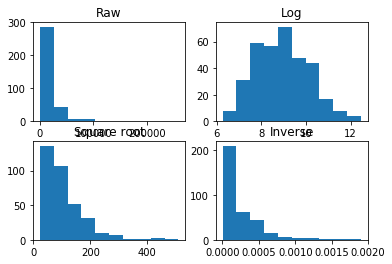

In [27]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(model['Population'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(model['Population'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(model['Population'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/model['Population'].dropna())
plt.title('Inverse')
plt.show()

###### Using the log transformation of the Population feature provides a more normal distribution

In [28]:
model['log_Pop'] = np.log(model['Population'])

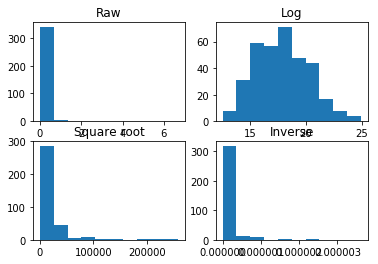

In [29]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(model['Population^2'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(model['Population^2'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(model['Population^2'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/model['Population^2'].dropna())
plt.title('Inverse')
plt.show()

###### Using the log transformation of the Population^2 feature provides a more normal distribution

In [30]:
model['log_Pop^2'] = np.log(model['Population^2'])

###### Newly prepped model DataFrame

In [31]:
model.head()

,Prop_crime,Population,Population^2,Murder_tf,Robbery_tf,log_Pop,log_Pop^2
0,12.0,1861.0,3.463321e+06,0,0,7.528869,15.057739
1,24.0,2577.0,6.640929e+06,0,0,7.854381,15.708762
2,16.0,2846.0,8.099716e+06,0,0,7.953670,15.907340
3,4090.0,97956.0,9.595378e+09,1,1,11.492274,22.984547
4,223.0,6388.0,4.080654e+07,0,1,8.762177,17.524353


###### What does a pairplot look like?

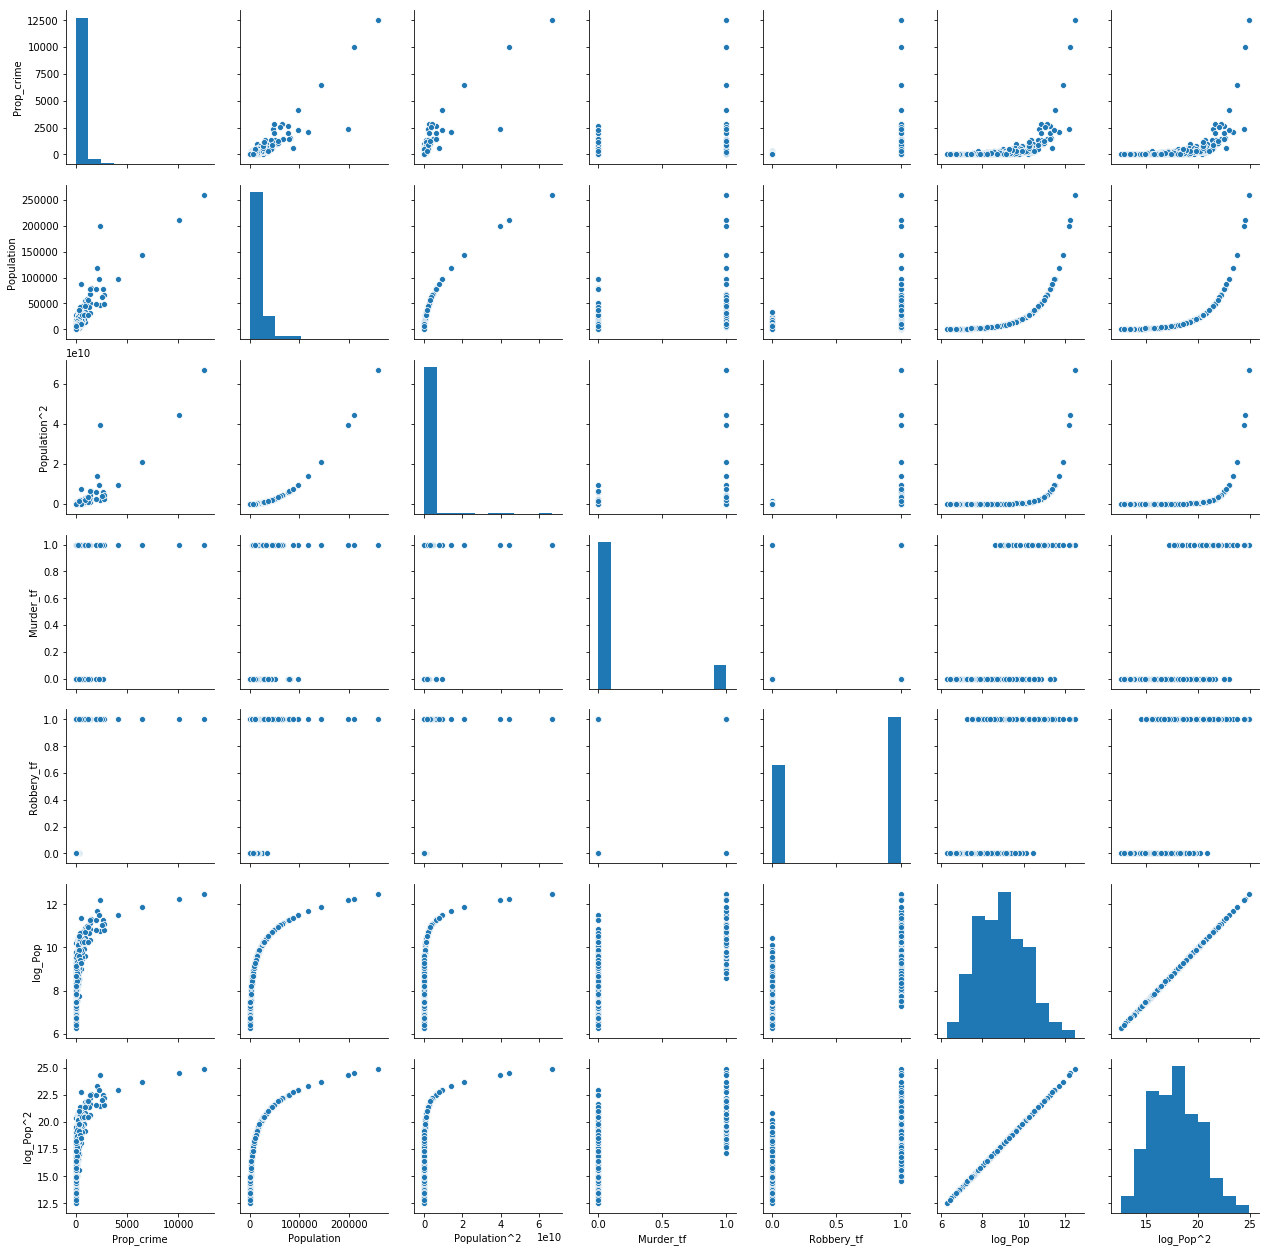

In [32]:
sns.pairplot(model)
plt.show()